In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills)

In [3]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

Example 1
Let's visualize the breakdown of jobs that let you work from home versus those that don't as a pie chart.

In [4]:
work_from_home = df_DA['job_work_from_home'].value_counts()

In [5]:
work_from_home

job_work_from_home
False    182749
True      13326
Name: count, dtype: int64

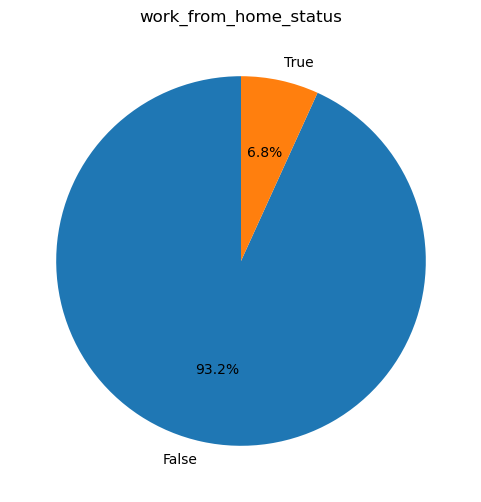

In [6]:
plt.figure(figsize=(6,6))
plt.pie(work_from_home, labels= ['False','True'], autopct= '%1.1f%%', startangle= 90)
plt.title('work_from_home_status')
plt.show()

Example 2
Now let's create pie charts for these other boolean columns: job_no_degree_mention and job_health_insurance.

In [7]:
job_no_degree = df_DA['job_no_degree_mention'].value_counts()

In [8]:
job_health_insurance = df_DA['job_health_insurance'].value_counts()

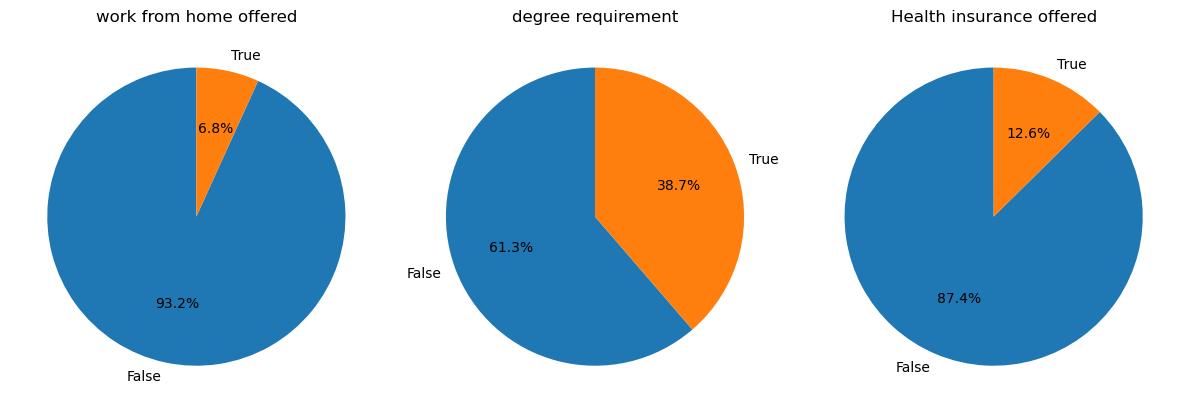

In [9]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

plt.subplot(1,3,1)
plt.pie(work_from_home, labels= ['False','True'],autopct= '%1.1f%%' ,startangle= 90 )
plt.title('work from home offered')

plt.subplot(1,3,2)
plt.pie(job_no_degree, labels= ['False','True'],autopct= '%1.1f%%' ,startangle= 90 )
plt.title('degree requirement')

plt.subplot(1,3,3)
plt.pie(job_health_insurance, labels= ['False','True'],autopct= '%1.1f%%' ,startangle= 90 )
plt.title('Health insurance offered')   

plt.tight_layout()
plt.show()

Alternatively, you can use a for loop for this.

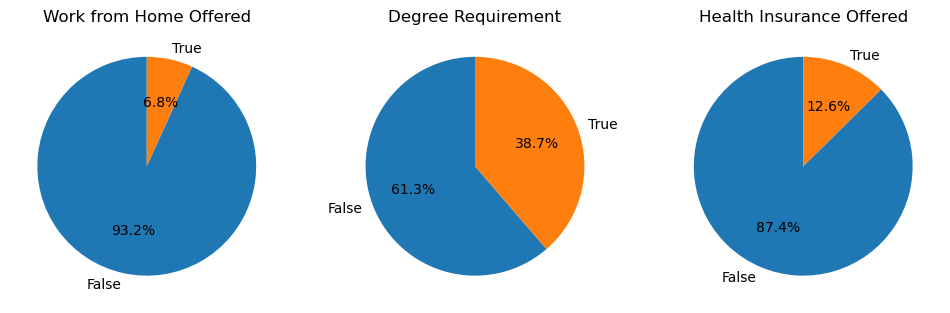

In [10]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}


fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


plt.show()


